In [5]:
import sqlite3
import pandas as pd 

#firstly lets create a database
conn=sqlite3.connect('Maindb.db')

In [6]:
#createed a cursor object of the Maindb database
# lets load the csv file into the database of sqlite3 
df=pd.read_csv('Details.csv')
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [7]:
df.shape

(1500, 7)

In [8]:
#lets store this above dataframe into the table of database 
df.to_sql('online_orders',conn,if_exists='replace',index=False)
#here, we successfully created a table in the database with the name of online_orders 


1500

In [9]:
#lets run some query on this table
query='select * from online_orders '
# pd.read_sql_query(query,conn) #and we  can also store this in the dataframe as follows 
d=pd.read_sql_query(query,conn)
d.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


## We are successfully connected to the db and also loaded the table.

## Query 1


In [10]:
#lets perfrom the operations according to the requirement of the task
#lets run more query on the above loaded table 
query='select * from online_orders order by Quantity desc limit 5'
print('Top 5 orders with the highest quanity')
pd.read_sql_query(query,conn)
# conn.execute(query).fetchall() #we can also use this to execure the queries in the database's tables

Top 5 orders with the highest quanity


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,5729,64,14,Furniture,Chairs,EMI
1,B-26055,213,4,14,Clothing,Shirt,COD
2,B-25640,1499,239,13,Clothing,Saree,Credit Card
3,B-26019,585,175,13,Clothing,T-shirt,COD
4,B-25798,2830,-1981,13,Furniture,Bookcases,EMI


## Query 2


In [11]:
#lets run the groupby
print('Total number of order from each category')
 
query='select Category,sum(quantity) as total_quantity from online_orders group by Category ' 
print(pd.read_sql_query(query,conn)) #displaying the result using print
#here we have run the groupby commad 


Total number of order from each category
      Category  total_quantity
0     Clothing            3516
1  Electronics            1154
2    Furniture             945


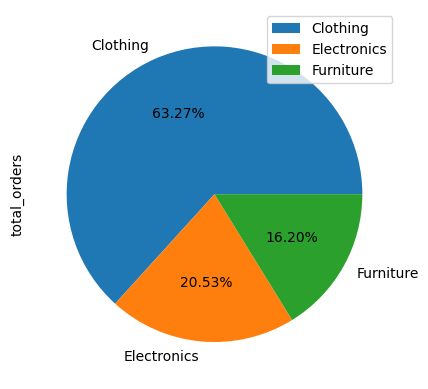

In [14]:
#lets plot the output using the matplotlib library
import matplotlib.pyplot as plt 
#we have to use [] if columns name contains the space in it
query='select Category ,count([Order ID]) as total_orders from online_orders group by Category'
d=pd.read_sql_query(query,conn)
d.plot(x='Category',y='total_orders',kind='pie',labels=d['Category'],autopct='%.2f%%')
plt.show()

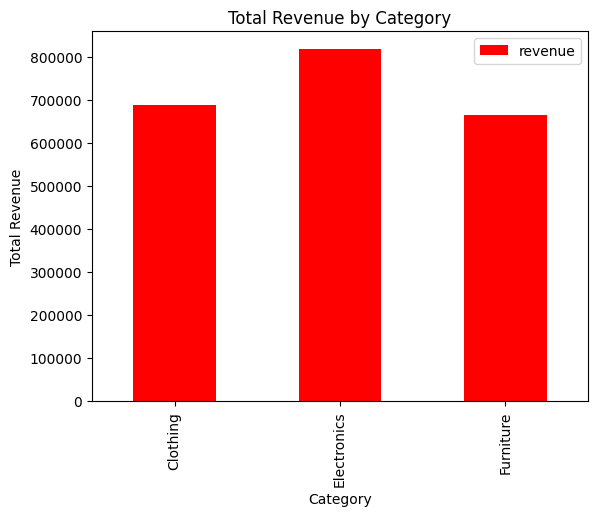

In [13]:
# SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS
# revenue FROM sales GROUP BY product"
query='select Category,sum(quantity) as total_quantity , sum(quantity*Amount) as revenue from online_orders group by category'
d=pd.read_sql_query(query,conn) #thisis the output 
#lets plot it in the bar graph 
d.plot(kind='bar',x='Category',y='revenue',title='Total Revenue by Category',color='red')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

